This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
lead = 12
obs = 3

data = pd.read_csv("../csv/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs_dataset_with_pts.csv".format(lead, obs, lead, obs))
data

,PatientStayID,Class,Age,APACHEIVscore,APACHEIVaScore,UrgentAdmission,AdmissionCategory,NumBeds,TeachingStatus,Gender,...,comorbidity_rheumd,comorbidity_coag,comorbidity_obes,comorbidity_wloss,comorbidity_fed,comorbidity_blane,comorbidity_dane,comorbidity_alcohol,comorbidity_drug,comorbidity_depre
0,151708,1,79.0,38.0,38.0,0.0,4.0,4.0,1,Male,...,0,0,0,0,0,0,0,0,0,0
1,152171,1,84.0,38.0,38.0,1.0,4.0,2.0,0,Female,...,0,0,0,0,0,0,0,0,0,0
2,155126,1,71.0,65.0,65.0,1.0,4.0,4.0,1,Male,...,0,0,0,0,0,0,0,0,0,0
3,156970,1,56.0,32.0,32.0,0.0,4.0,4.0,1,Male,...,0,0,0,0,0,0,0,1,0,0
4,163084,1,22.0,59.0,59.0,0.0,2.0,2.0,0,Male,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,3352386,0,45.0,36.0,36.0,0.0,2.0,2.0,0,Female,...,0,0,0,0,0,0,0,0,0,0
12186,3352563,0,34.0,54.0,54.0,0.0,4.0,2.0,0,Female,...,0,0,0,0,0,0,0,0,0,0
12187,3352747,0,30.0,31.0,31.0,0.0,4.0,4.0,0,Male,...,0,0,0,0,0,0,0,0,0,0
12188,3353044,0,52.0,41.0,41.0,0.0,4.0,2.0,0,Male,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data = process_all(data)
data

,PatientStayID,Class,Age,APACHEIVscore,APACHEIVaScore,UrgentAdmission,NumBeds,TeachingStatus,Gender,AdmitHeight,...,UnitAdmitSource_Missing,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,UnitStayType_Admit,UnitStayType_Readmit,UnitStayType_Stepdown,UnitStayType_Transfer
0,151708,1,79.0,38.0,38.0,0.0,4.0,1,0.0,175.3,...,0,0,0,0,0,0,1,0,0,0
1,152171,1,84.0,38.0,38.0,1.0,2.0,0,1.0,165.1,...,0,1,0,0,0,0,1,0,0,0
2,155126,1,71.0,65.0,65.0,1.0,4.0,1,0.0,165.1,...,0,1,0,0,0,0,1,0,0,0
3,156970,1,56.0,32.0,32.0,0.0,4.0,1,0.0,167.6,...,0,0,0,0,0,0,1,0,0,0
4,163084,1,22.0,59.0,59.0,0.0,2.0,0,0.0,152.4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,3352386,0,45.0,36.0,36.0,0.0,2.0,0,1.0,160,...,0,0,0,0,0,0,1,0,0,0
12186,3352563,0,34.0,54.0,54.0,0.0,2.0,0,1.0,172.7,...,0,0,0,0,0,0,1,0,0,0
12187,3352747,0,30.0,31.0,31.0,0.0,4.0,0,0.0,167.6,...,0,0,0,0,0,0,1,0,0,0
12188,3353044,0,52.0,41.0,41.0,0.0,2.0,0,0.0,175,...,0,0,0,0,0,0,1,0,0,0


In [4]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

,PatientStayID,Class,Age,APACHEIVscore,APACHEIVaScore,UrgentAdmission,NumBeds,TeachingStatus,Gender,AdmitHeight,...,UnitAdmitSource_Missing,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,UnitStayType_Admit,UnitStayType_Readmit,UnitStayType_Stepdown,UnitStayType_Transfer
0,151708,1,79.0,38.0,38.0,0.0,4.0,1,0.0,175.3,...,0,0,0,0,0,0,1,0,0,0
1,152171,1,84.0,38.0,38.0,1.0,2.0,0,1.0,165.1,...,0,1,0,0,0,0,1,0,0,0
2,155126,1,71.0,65.0,65.0,1.0,4.0,1,0.0,165.1,...,0,1,0,0,0,0,1,0,0,0
3,156970,1,56.0,32.0,32.0,0.0,4.0,1,0.0,167.6,...,0,0,0,0,0,0,1,0,0,0
4,163084,1,22.0,59.0,59.0,0.0,2.0,0,0.0,152.4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,3352386,0,45.0,36.0,36.0,0.0,2.0,0,1.0,160,...,0,0,0,0,0,0,1,0,0,0
12186,3352563,0,34.0,54.0,54.0,0.0,2.0,0,1.0,172.7,...,0,0,0,0,0,0,1,0,0,0
12187,3352747,0,30.0,31.0,31.0,0.0,4.0,0,0.0,167.6,...,0,0,0,0,0,0,1,0,0,0
12188,3353044,0,52.0,41.0,41.0,0.0,2.0,0,0.0,175,...,0,0,0,0,0,0,1,0,0,0


In [5]:
common_imputation= ["Gender", "UrgentAdmission"]
one_hot_removal =["UnitAdmitSource_Missing"]
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead, obs) ]#, "mean_motor_GCS", "mean_verbal_GCS", "mean_eyes_GCS", "mean_total_GCS"]

# common_imputation = ["Gender"]
# one_hot_removal = []
# remove = []

exceptions =["last_verbal_GCS", "last_eyes_GCS", "last_total_GCS"]

mean_imputation = data.columns 
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [6]:
from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [7]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

10696


,PatientStayID,Age,APACHEIVscore,UrgentAdmission,NumBeds,TeachingStatus,Gender,AdmitHeight,AdmitWeight,HistAICD,...,UnitAdmitSource_Missing,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,UnitStayType_Admit,UnitStayType_Readmit,UnitStayType_Stepdown,UnitStayType_Transfer
13,200923.0,79.0,84.000000,0.0,4.0,1.0,1.0,162.60,99.20,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
16,213517.0,49.0,117.000000,0.0,4.0,1.0,1.0,188.00,130.50,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24,242154.0,46.0,77.000000,0.0,4.0,0.0,1.0,157.48,53.09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,242505.0,90.0,78.000000,0.0,4.0,0.0,1.0,165.10,61.80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26,246416.0,89.0,65.000000,0.0,4.0,0.0,0.0,177.80,75.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,3199842.0,29.0,25.000000,0.0,4.0,1.0,0.0,191.00,76.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12087,3199881.0,36.0,21.000000,0.0,4.0,1.0,0.0,180.00,83.90,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12088,3200031.0,63.0,59.429535,0.0,4.0,1.0,1.0,165.00,72.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12098,3328663.0,48.0,77.000000,0.0,4.0,0.0,1.0,170.10,109.30,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
print(np.sum(labels==1))

2381


In [9]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

,PatientStayID,Age,APACHEIVscore,UrgentAdmission,NumBeds,TeachingStatus,Gender,AdmitHeight,AdmitWeight,HistAICD,...,UnitAdmitSource_Missing,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,UnitStayType_Admit,UnitStayType_Readmit,UnitStayType_Stepdown,UnitStayType_Transfer
13,200923.0,0.912138,0.965336,-0.342845,0.851257,1.117352,1.066332,-0.344065,0.532642,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,6.464054,-2.708636,3.934557,-0.088969,-0.232827
16,213517.0,-0.924628,2.285984,-0.342845,0.851257,1.117352,1.066332,1.087902,1.668333,-0.169874,...,0.0,-0.282786,-0.041057,4.496913,-0.227649,-0.154702,0.369189,-0.254158,-0.088969,-0.232827
24,242154.0,-1.108305,0.685198,-0.342845,0.851257,-0.894973,1.066332,-0.632714,-1.140416,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,-0.154702,0.369189,-0.254158,-0.088969,-0.232827
25,242505.0,1.585619,0.725218,-0.342845,0.851257,-0.894973,1.066332,-0.203123,-0.824382,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,-0.154702,0.369189,-0.254158,-0.088969,-0.232827
26,246416.0,1.524393,0.204963,-0.342845,0.851257,-0.894973,-0.937795,0.512860,-0.345432,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,-0.154702,0.369189,-0.254158,-0.088969,-0.232827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,3199842.0,-2.149139,-1.395823,-0.342845,0.851257,1.117352,-0.937795,1.257032,-0.309148,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,-0.154702,0.369189,-0.254158,-0.088969,-0.232827
12087,3199881.0,-1.720560,-1.555901,-0.342845,0.851257,1.117352,-0.937795,0.636889,-0.022504,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,-0.154702,-2.708636,3.934557,-0.088969,-0.232827
12088,3200031.0,-0.067471,-0.017965,-0.342845,0.851257,1.117352,1.066332,-0.208761,-0.436142,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,-0.154702,-2.708636,-0.254158,-0.088969,4.295029
12098,3328663.0,-0.985854,0.685198,-0.342845,0.851257,-0.894973,1.066332,0.078760,0.899111,-0.169874,...,0.0,-0.282786,-0.041057,-0.222375,-0.227649,-0.154702,0.369189,-0.254158,-0.088969,-0.232827


# Visualize Data

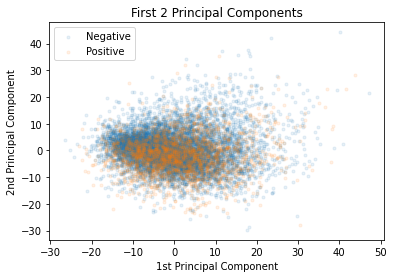

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [11]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs".format(lead, obs, lead, obs), calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


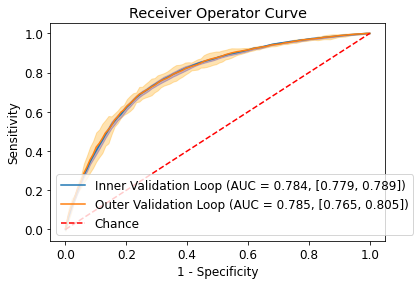

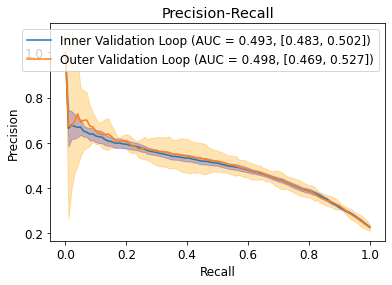

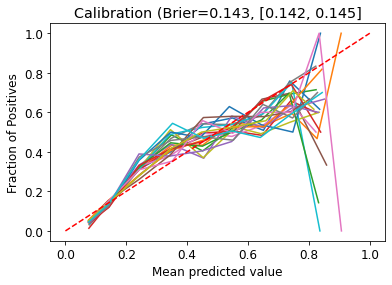

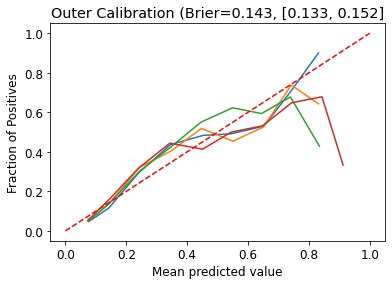

In [12]:
result_dict = lr_calibrated
name = "relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.02, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [14]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])
import pickle as pickle
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_selected_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(selected_feat, f)

147
Age
APACHEIVscore
UrgentAdmission
TeachingStatus
Gender
AdmitHeight
HistAngina
HistArrythmia
HistCABG
HistPulmEmb
HistHeartTransp
HistVenThromb
Histhyperthyroid
HistSteroid Use
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistOncology
HistDementia
HistNeuromuscularDis
HistSeizures
HistTIA
HistRestrictiveDis
relative_12hr_lead_3hr_obsAdrenergicBronchodilators
relative_12hr_lead_3hr_obsaminoglycosides
relative_12hr_lead_3hr_obsAnticholinergicBronchodilators
relative_12hr_lead_3hr_obsAntihistamines
relative_12hr_lead_3hr_obsBarbiturates
relative_12hr_lead_3hr_obsBenzodiazepines
relative_12hr_lead_3hr_obsCephalosporins
relative_12hr_lead_3hr_obsClassVAntiarrhythmics
relative_12hr_lead_3hr_obsColloidFluids
relative_12hr_lead_3hr_obsCrystalloidFluids
relative_12hr_lead_3hr_obsDiuretics
relative_12hr_lead_3hr_obsGeneralAnesthetics
relative_12hr_lead_3hr_obsGlycopeptides
relative_12hr_lead_3hr_obsH2Blockers
relative_12hr_lead_3hr_obsLaxatives
relative_12

In [15]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(dropped_feat, f)

hr_value__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20)
hr_value__fft_coefficient__attr_"real"__coeff_0
hr_value__fft_coefficient__attr_"abs"__coeff_0
hr_value__sum_values
hr_value__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)
hr_value__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"
hr_value__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20)
hr_value__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"mean"
hr_value__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20)
hr_value__linear_trend__attr_"intercept"
hr_value__cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)
hr_value__c3__lag_1
hr_value__quantile__q_0.7
hr_value__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)

In [16]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl".format(lead, obs), "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [17]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

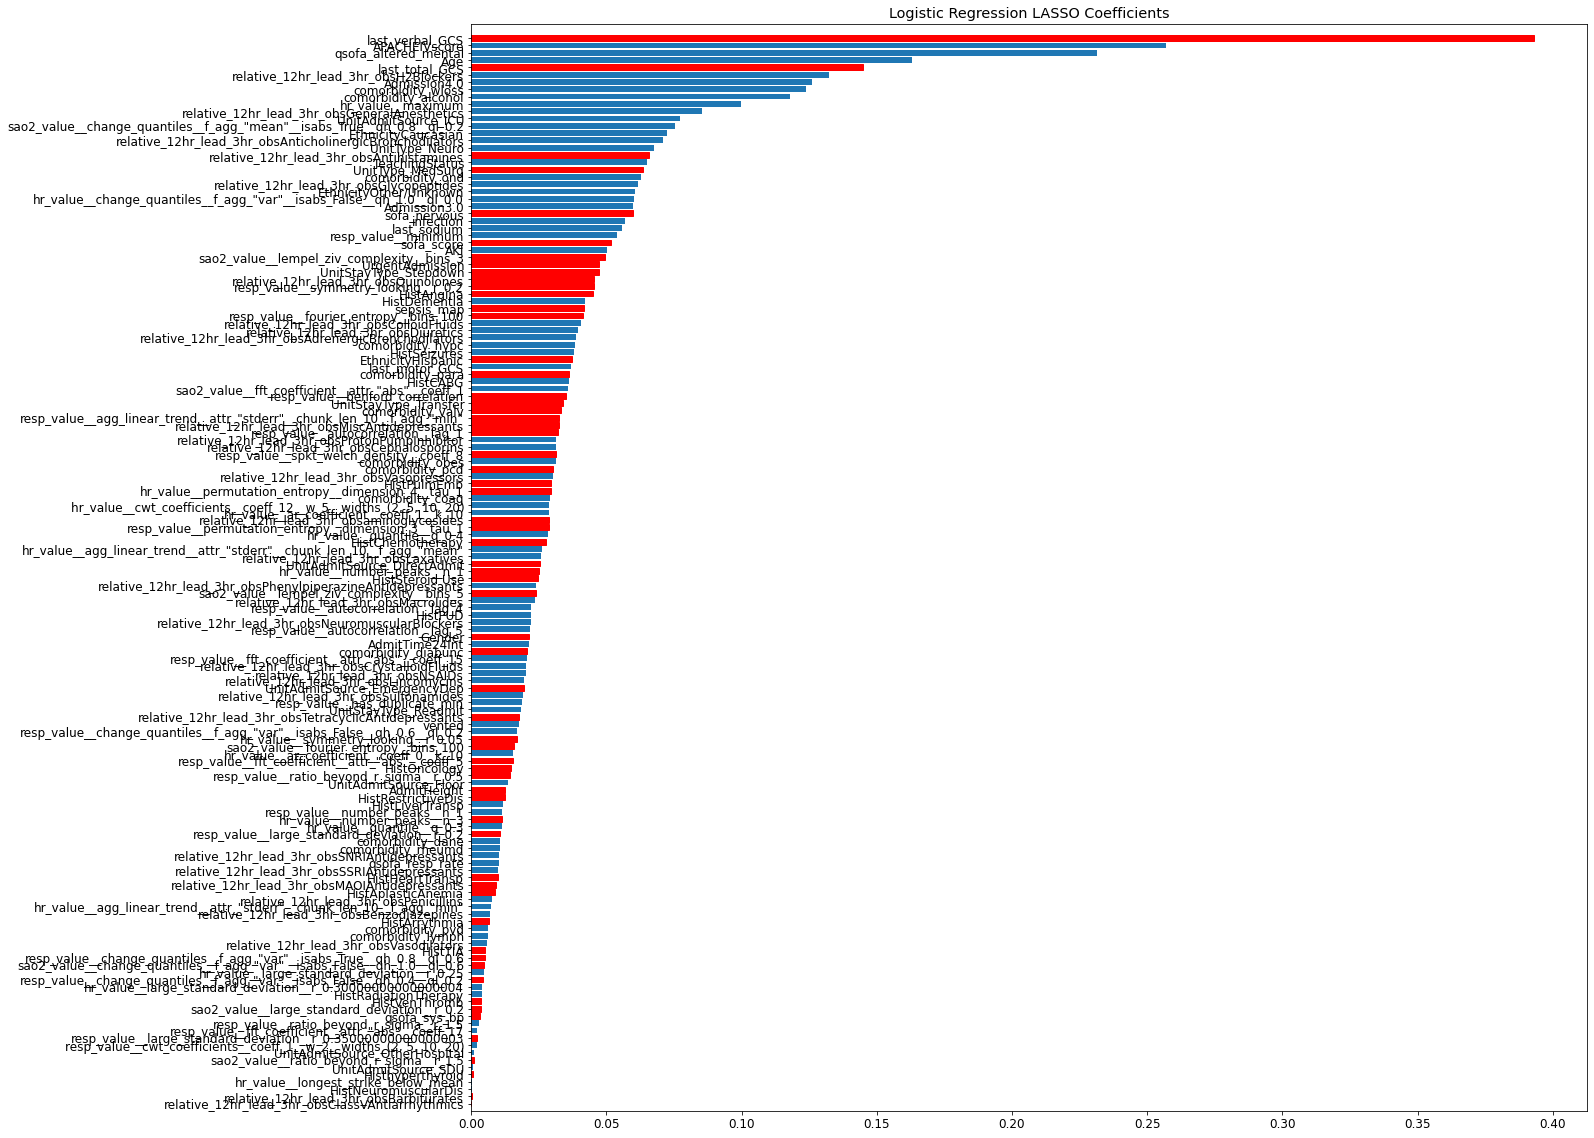

In [18]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

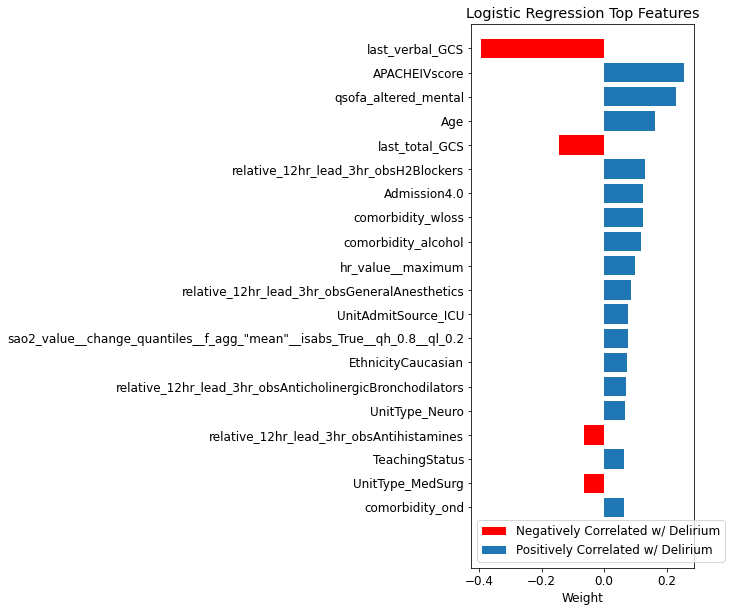

In [20]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_coefficients_short.png'.format(lead, obs), dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

In [ ]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/rf".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/rf".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

In [ ]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned_pts/rf".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_pruned_pts/rf".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [14]:
catboost_result = run_cross_validation(data, "CatBoostClassifier", {"auto_class_weights" : "Balanced", "l2_leaf_reg" : 5}, "from catboost import CatBoostClassifier", run_once = True, bayes=False, dataset="relative_1hr_lead_6hr_obs_data/relative_1hr_lead_6hr_obs", calibrate=False)

al: 10.1s	remaining: 6.34s
614:	learn: 0.4007891	total: 10.1s	remaining: 6.32s
615:	learn: 0.4006133	total: 10.1s	remaining: 6.3s
616:	learn: 0.4003428	total: 10.1s	remaining: 6.28s
617:	learn: 0.4001537	total: 10.1s	remaining: 6.27s
618:	learn: 0.3999214	total: 10.2s	remaining: 6.25s
619:	learn: 0.3996135	total: 10.2s	remaining: 6.23s
620:	learn: 0.3994248	total: 10.2s	remaining: 6.22s
621:	learn: 0.3992061	total: 10.2s	remaining: 6.2s
622:	learn: 0.3991959	total: 10.2s	remaining: 6.18s
623:	learn: 0.3990423	total: 10.2s	remaining: 6.17s
624:	learn: 0.3988612	total: 10.2s	remaining: 6.15s
625:	learn: 0.3987051	total: 10.3s	remaining: 6.13s
626:	learn: 0.3985358	total: 10.3s	remaining: 6.11s
627:	learn: 0.3983226	total: 10.3s	remaining: 6.1s
628:	learn: 0.3982095	total: 10.3s	remaining: 6.08s
629:	learn: 0.3979450	total: 10.3s	remaining: 6.07s
630:	learn: 0.3978353	total: 10.3s	remaining: 6.05s
631:	learn: 0.3976056	total: 10.4s	remaining: 6.04s
632:	learn: 0.3975929	total: 10.4s	remai

In [20]:
catboost_result["iauc"]

array([0.80917297, 0.81547087, 0.80656371, 0.82145364, 0.81970437,
       0.81102667, 0.79484595, 0.81419231, 0.82217568, 0.81552553,
       0.81422872, 0.8142072 , 0.80442019, 0.81786605, 0.81463806,
       0.80321488, 0.78734536, 0.81755255, 0.81628503, 0.79984195])

In [93]:
import pickle
with open('../pickle/mean_relative_3hr/catboost_with_indicators', 'wb') as f:
    pickle.dump(catboost_result, f)

In [109]:
import pickle
with open('../pickle/mean_relative/catboost', 'rb') as f:
    catboost_result = pickle.load(f)

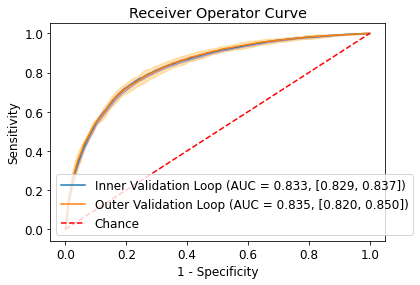

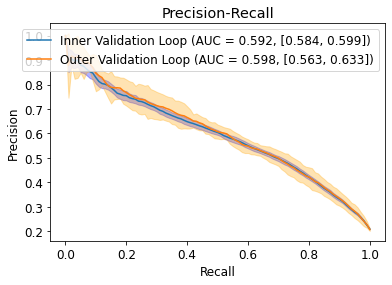

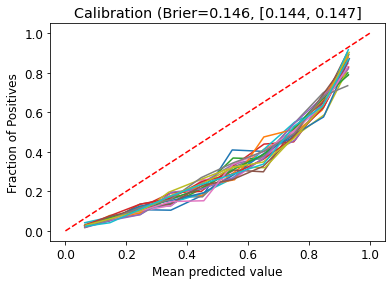

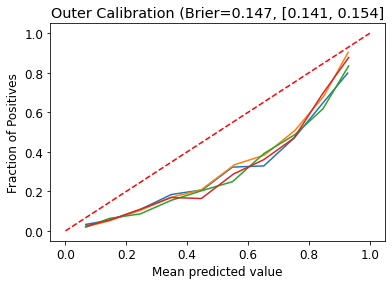

In [15]:
result_dict = catboost_result
name = "relative_1hr_lead_6hr_obs/mean_unpruned/catboost_no_pts"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

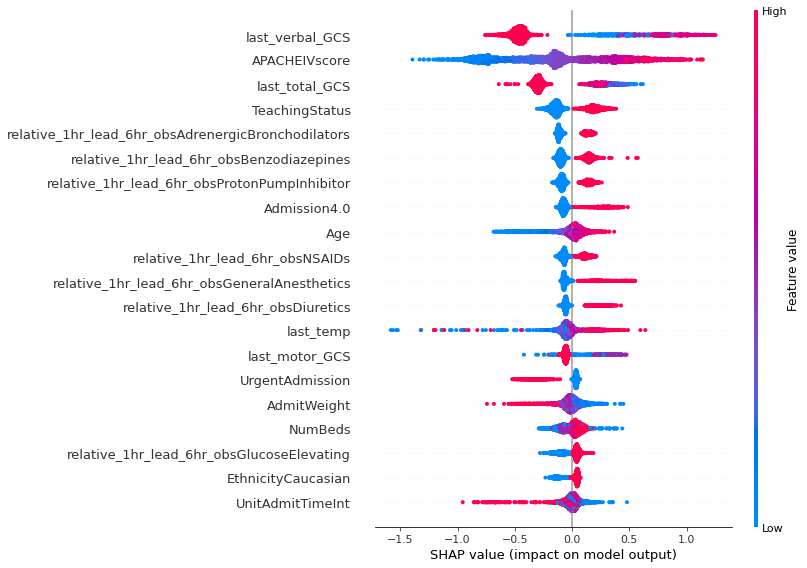

In [16]:
import shap
explainer = shap.TreeExplainer(catboost_result["imodels"][0])
temp_data = catboost_result["ipatid"][0].to_frame().merge(data, on="PatientStayID", how="inner")
shap_values = explainer.shap_values(temp_data.iloc[:, 1:])
shap.summary_plot(shap_values, temp_data.iloc[:, 1:], show=False)
plt.savefig("../figures/relative_1hr_lead_6hr_obs/mean_unpruned/catboost_shapley_plot_full.png", bbox_inches="tight")